In [1]:
import tqdm
import numpy as np
import scipy.stats
import pandas as pd
import sklearn
import sklearn.covariance
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import seaborn as sns
sns.set_style('ticks')
palette = sns.color_palette("RdBu_r", n_colors=25)

import kliep

## Company trend

In [9]:
df = pd.read_csv('data/agfam.csv')
df = df.drop(['Week'], axis=1)
df = (df - df.mean()) / df.std()
X = df.values
df[:5]

,Apple,Google,Facebook,Amazon,Microsoft
0,0.920398,0.619629,-0.497073,-1.094401,-0.457035
1,0.191342,-0.156953,-0.835368,-1.094401,-0.457035
2,0.312852,-1.030608,-0.666220,-1.094401,-0.457035
3,0.312852,1.299139,-0.609838,-0.371265,0.251596
4,2.013982,-0.059880,-0.553455,1.798142,0.960226


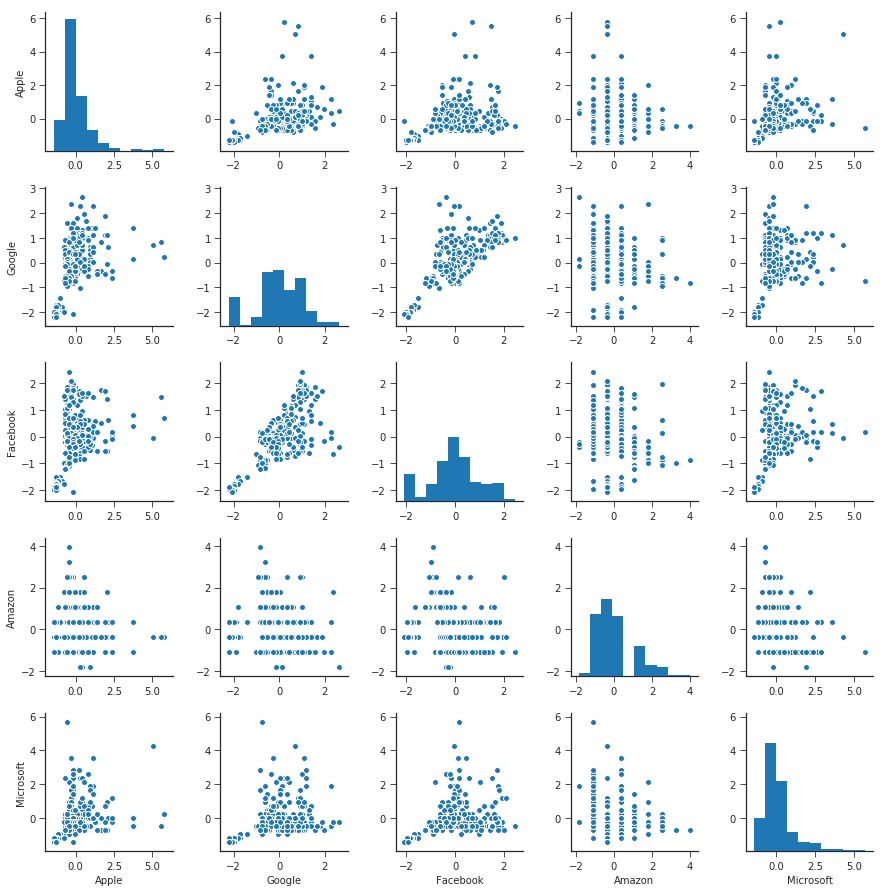

In [10]:
sns.pairplot(data=df)

In [ ]:
model = sklearn.covariance.GraphLasso(alpha=0.3)
model.fit(X)

In [11]:
mi = kliep.calc_mi_matrix(X)

100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


In [12]:
cmi = kliep.calc_cmi_matrix(X)

100%|██████████| 10/10 [00:54<00:00,  5.51s/it]


In [13]:
cmi2 = kliep.calc_cmi_matrix2(X)
cmi3 = kliep.calc_cmi_matrix3(X)

100%|██████████| 10/10 [00:38<00:00,  4.26s/it]


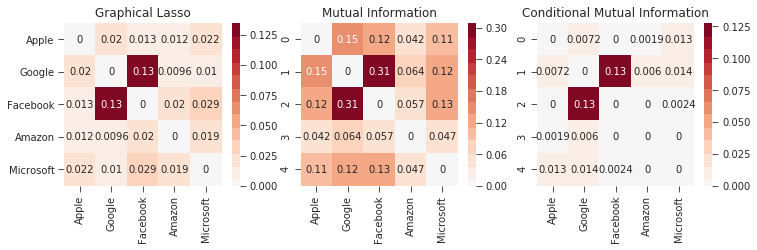

In [14]:
f, axes = plt.subplots(1, 3, figsize=[12, 3])
axes[0].set_title('Graphical Lasso')
axes[1].set_title('Mutual Information')
axes[2].set_title('Conditional Mutual Information')
# sns.heatmap(model.precision_, annot=True, ax=axes[0], center=0, xticklabels=list(df.columns), yticklabels=list(df.columns), cmap=palette)
sns.heatmap(mi, annot=True, ax=axes[1], center=0, xticklabels=list(df.columns), cmap=palette)
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, xticklabels=list(df.columns), cmap=palette)
sns.heatmap(cmi2, annot=True, ax=axes[0], center=0, xticklabels=list(df.columns), yticklabels=list(df.columns), cmap=palette)

## Buzz words

In [15]:
df = pd.read_csv('data/buzz-words.csv')
df = df.drop(['Week'], axis=1)
df = df[df['Big Data: (Worldwide)'] < 70]
df = (df - df.mean()) / df.std()
X = df.values
df[:5]

,Artificial Intelligence: (Worldwide),Machine Learning: (Worldwide),Deep Learning: (Worldwide),Big Data: (Worldwide),Internet of things: (Worldwide)
0,-0.799639,-0.391624,-1.135133,-0.325257,-0.887446
1,-1.002971,-0.627871,-1.135133,-0.681328,-0.887446
2,-0.799639,-0.627871,-1.135133,-1.037399,-0.887446
3,-0.799639,-0.155378,-1.135133,-0.147222,-0.887446
4,-0.596308,-0.627871,-1.135133,-0.503293,-0.887446


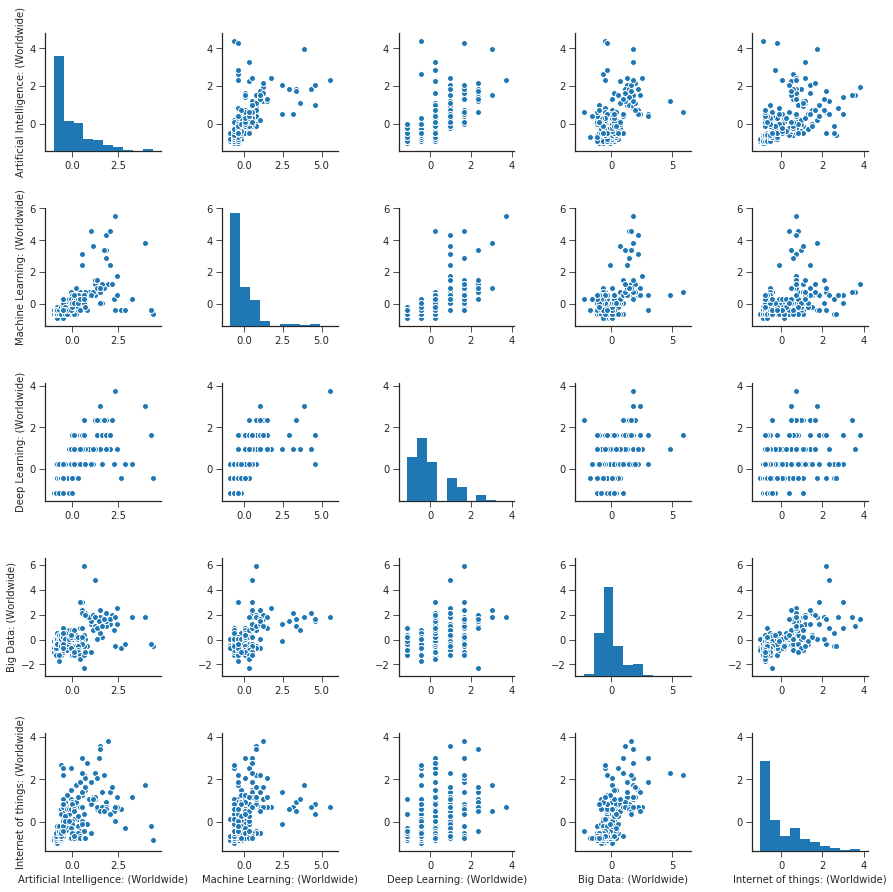

In [16]:
sns.pairplot(data=df)

In [ ]:
# model = sklearn.covariance.GraphLassoCV(alphas=[0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8])
model = sklearn.covariance.GraphLasso(alpha=0.6, assume_centered=True)
model.fit(df.values)

In [17]:
mi = kliep.calc_mi_matrix(X)

100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


In [18]:
cmi = kliep.calc_cmi_matrix(X)

100%|██████████| 10/10 [00:59<00:00,  6.06s/it]


In [19]:
cmi2 = kliep.calc_cmi_matrix2(X)

100%|██████████| 10/10 [00:43<00:00,  4.19s/it]


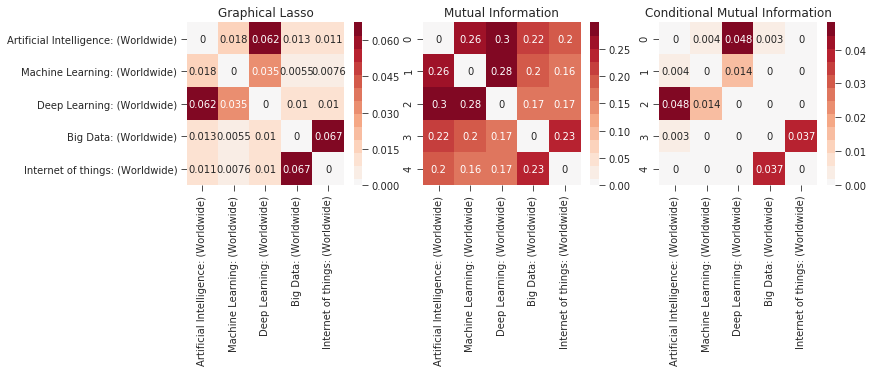

In [20]:
f, axes = plt.subplots(1, 3, figsize=[12, 3])
axes[0].set_title('Graphical Lasso')
axes[1].set_title('Mutual Information')
axes[2].set_title('Conditional Mutual Information')
# sns.heatmap(model.precision_, annot=True, ax=axes[0], center=0, xticklabels=list(df.columns), yticklabels=list(df.columns), cmap=palette)
sns.heatmap(mi, annot=True, ax=axes[1], center=0, xticklabels=list(df.columns), cmap=palette)
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, xticklabels=list(df.columns), cmap=palette)
sns.heatmap(cmi2, annot=True, ax=axes[0], center=0, xticklabels=list(df.columns), yticklabels=list(df.columns), cmap=palette)

## Stock

In [2]:
df = pd.read_csv('data/stock1.csv', index_col=0)
df.columns = pd.read_csv('data/stock2.csv', index_col=0).values[:, 0]
df = df[df.columns[4:9]]
# df = df[df.columns[25:30]] # よさげ
X = df.values
X = sklearn.preprocessing.scale(X)
df[:5]

,ADBE,AMD,AES,AET,AFL
1,25.60,7.01,3.24,42.04,31.59
2,26.30,6.94,3.45,42.33,31.60
3,27.51,7.16,3.45,42.75,32.00
4,28.51,7.17,3.37,42.18,31.73
5,27.13,6.69,3.35,42.23,31.80


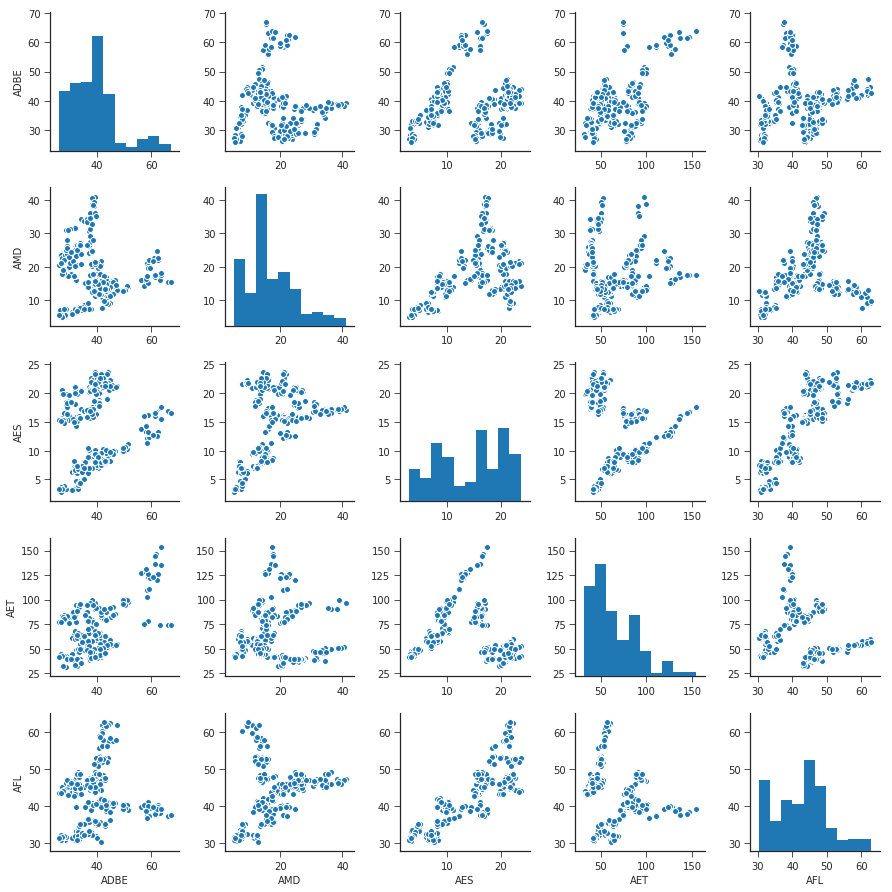

In [3]:
sns.pairplot(df.sample(300))
plt.tight_layout()
plt.savefig('output/pair-stock.pdf', format='pdf')

In [ ]:
# alpha_cv: 0.64902688814705944
model = sklearn.covariance.GraphLasso(alpha=0.3, assume_centered=True)
model.fit(X)

In [4]:
mi = kliep.calc_mi_matrix(X)

100%|██████████| 10/10 [00:06<00:00,  1.67it/s]


In [5]:
cmi = kliep.calc_cmi_matrix(X)

100%|██████████| 10/10 [00:45<00:00,  4.73s/it]


In [6]:
cmi2 = kliep.calc_cmi_matrix2(X)

100%|██████████| 10/10 [00:30<00:00,  3.18s/it]


In [7]:
cmi3 = kliep.calc_cmi_matrix3(X)

100%|██████████| 10/10 [00:33<00:00,  3.37s/it]


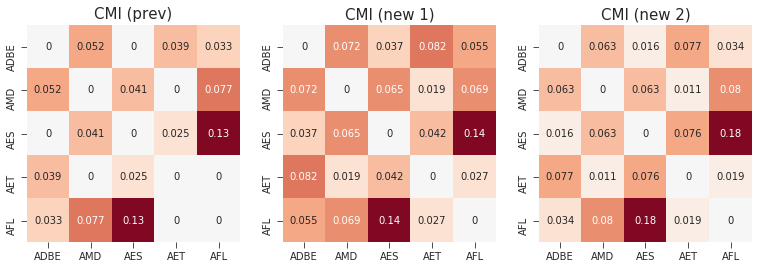

In [8]:
f, axes = plt.subplots(1, 3, figsize=[13, 4])
axes[0].set_title('CMI (prev)', fontsize=15)
axes[1].set_title('CMI (new 1)', fontsize=15)
axes[2].set_title('CMI (new 2)', fontsize=15)
sns.heatmap(cmi, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))
sns.heatmap(cmi2, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))
sns.heatmap(cmi3, annot=True, ax=axes[2], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))

In [ ]:
f, axes = plt.subplots(1, 3, figsize=[13, 4])
axes[0].set_title('Graphical Lasso', fontsize=15)
axes[1].set_title('Mutual Information', fontsize=15)
axes[2].set_title('Conditional Mutual Information', fontsize=15)
sns.heatmap(model.precision_, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))
sns.heatmap(mi, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))

In [ ]:
# 縦に並べたもの
f, axes = plt.subplots(3, 1, figsize=[4, 12.5])
axes[0].set_title('Graphical Lasso', fontsize=15)
axes[1].set_title('Mutual Information', fontsize=15)
axes[2].set_title('Conditional Mutual Information', fontsize=15)
sns.heatmap(model.precision_, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))
# sns.heatmap(pre, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False)
sns.heatmap(mi, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, cmap=palette, cbar=False, xticklabels=list(df.columns), yticklabels=list(df.columns))
plt.tight_layout()
plt.savefig('output/heat-stock.pdf', format='pdf')

In [ ]:
# df = pd.read_csv('data/stock1.csv', index_col=0)
# df.columns = pd.read_csv('data/stock2.csv', index_col=0).values[:, 0]
# print(len(df.columns))
# cmi = kliep.calc_cmi_matrix(df.values, maxiter=1000)

## Leukemia

In [ ]:
df = pd.read_csv('data/leukemia.csv', index_col=0)
df = (df - df.mean()) / df.std()
df = df[df.columns[1:6]]
X = df.values

In [ ]:
sns.pairplot(df)

In [ ]:
model = sklearn.covariance.GraphLasso(alpha=0.3, assume_centered=True)
model.fit(df.values)

In [ ]:
mi = kliep.calc_mi_matrix(X)

In [ ]:
cmi = kliep.calc_cmi_matrix(X)

In [ ]:
f, axes = plt.subplots(1, 3, figsize=[12, 3])
axes[0].set_title('Graphical Lasso')
axes[1].set_title('Mutual Information')
axes[2].set_title('Conditional Mutual Information')
sns.heatmap(model.precision_, annot=True, ax=axes[0], center=0, xticklabels=list(df.columns), yticklabels=list(df.columns), cmap=palette)
sns.heatmap(mi, annot=True, ax=axes[1], center=0, xticklabels=list(df.columns), cmap=palette)
sns.heatmap(cmi, annot=True, ax=axes[2], center=0, xticklabels=list(df.columns), cmap=palette)